# Принцип работы Центральной предельной теоремы

In [5]:
import scipy.stats as st
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

from IPython.display import display, clear_output

* Можно посмотреть [здесь](https://www.youtube.com/watch?v=zeJD6dqJ5lo) разные симуляции. Все не нужно смотреть, выборочно прлистать симуляции, суть будет ясна

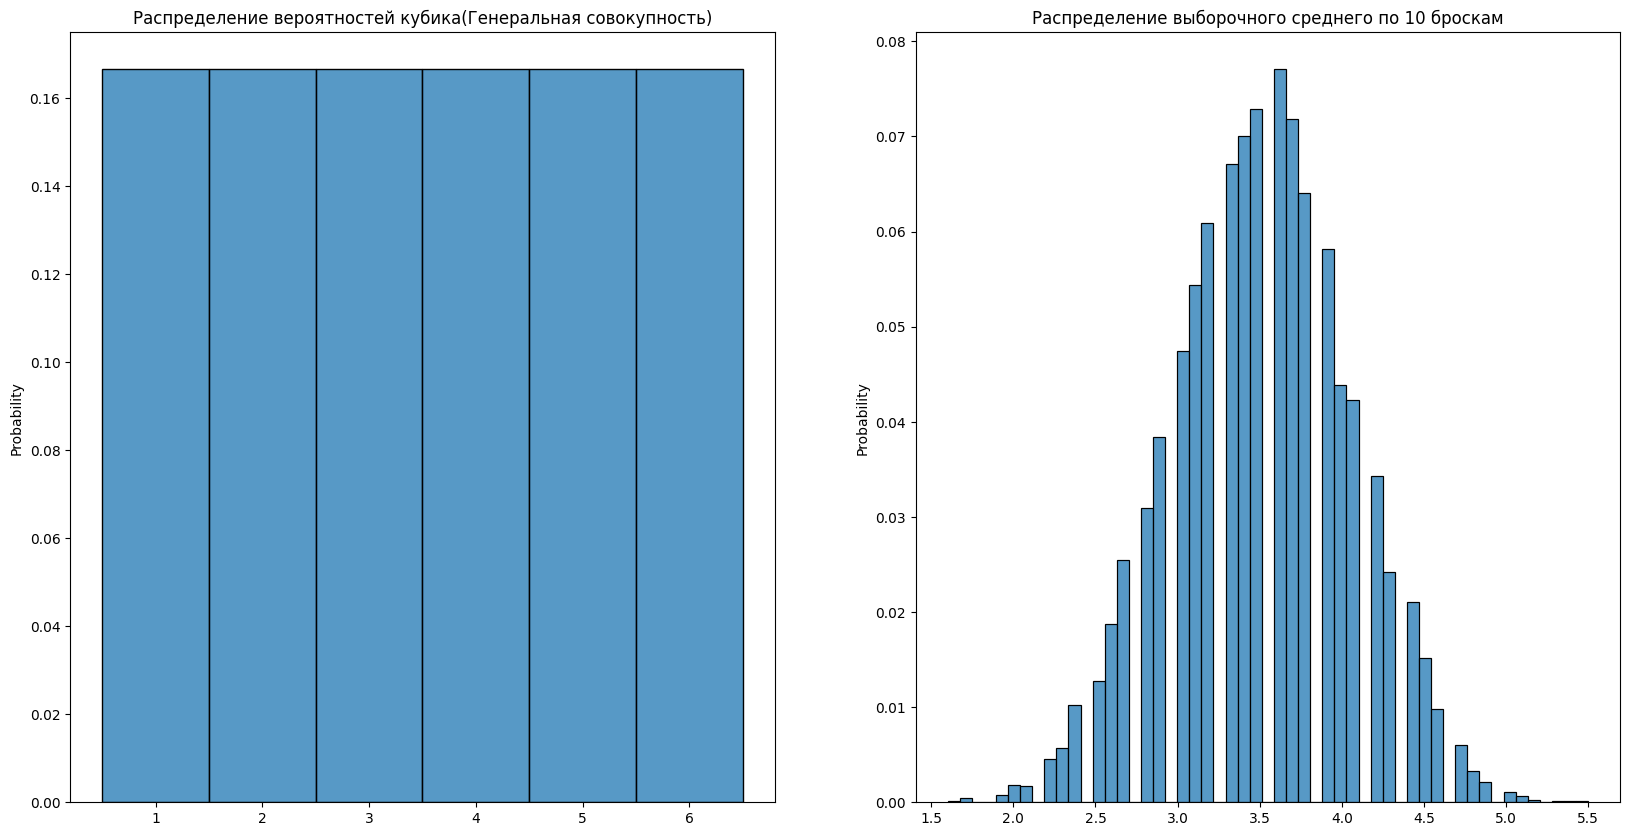

In [4]:
dice = np.array([1, 2, 3, 4, 5, 6]) # Возможные очки на кубике, все равновероятны, назовем это нашей ГС

N = 10000 # 1000 раз проведем эксперимент
M = 10 # В каждом эксперименте будем подбрасывать 10 раз кубик

sample_means = []

for i in range(N):
    sample_dice = np.random.choice(dice, size=M, replace=True) # Подкидываем кубик 10 раз
    sample_means.append(sample_dice.mean())
    
sample_means = np.array(sample_means)


fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.histplot(dice, ax=ax[0], bins = np.arange(0.5, 7.5, 1), stat='probability')
sns.histplot(sample_means, ax=ax[1], stat='probability')
ax[0].set_title('Распределение вероятностей кубика(Генеральная совокупность)')
ax[1].set_title(f'Распределение выборочного среднего по {M} броскам')
plt.show()

* __Можно увидеть, чаще всего выпадает в среднем 3.5, как и ожидаемо, но бывают и более редкие случаи, все это образует нормальное распределение и показываеи работу центральной предельной теоремы__

* __В данном примере мы сгенерировали много выборок, иначае говоря мы много раз провели эксперимент__

* __На практике, будет лишь одна выборка(один эксперимент над кубиком), нужно будет выдвигать гипотезы и делать выводы по этому выборке, об этом завтра__

## Пошаговая анимация работы центральной предельной теоремы

### 1.1

* Предположим, генеральная совокупность, рост всех взрослых людей на планете имеет нормальное распределение и содержит в себе 100000

In [58]:
population = st.norm(170, 10).rvs(100000)

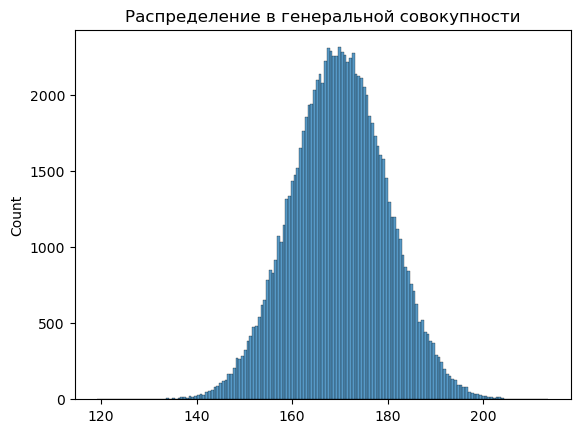

In [11]:
sns.histplot(population)
plt.title('Распределение в генеральной совокупности');

In [71]:
N = 50
M = 10


def central_limit_theorem_animation(population:list, N:int, M:int):
    '''
    population - Генеральная совокупность
    N - Кол-во взятых выборок из Генеральной совокупности. На практике часто будет одна выборка(!!!) именно по ней и нужно будет делать вывод
    M - Размер выборок


    '''
    population = np.array(population)
    
    means = np.array([])
    for i in range(N):
        sample = np.random.choice(population, size=M, replace=False)
        means = np.append(means, sample.mean())


        fig, ax = plt.subplots(1, 2, figsize=(20, 10))
        sns.histplot(population, ax=ax[0], label = 'Распределение Генеральной совокупности')

        for elem in sample:
            ax[0].axvline(elem, color='r', label='Выпавшие элементы выборки' if elem == sample[0] else '')
        ax[0].legend()
        ax[0].set_title('Распределение ГС')
        sns.histplot(means, ax=ax[1])
        ax[1].set_title('Распределение выборочных средних')


            # Добавление стрелки
        arrow_start = [np.mean(sample), 0]
        arrow_end = [np.mean(sample), max(np.histogram(means, bins=30)[0])]
        ax[1].annotate(f'среднее по {i+1} выборке = {np.round(means[-1], 2)}', 
                       xy=arrow_end, 
                       xytext=arrow_start,
                       arrowprops=dict(facecolor='black', shrink=0.02),
                      )
        
        plt.pause(0.001)
        clear_output(wait=True)
    return means
        
#central_limit_theorem_animation(population, N, M)

* __По анимации эксперимента, можно увидеть, что выборочное среднее действительно распределено нормально__

### 1.2 Можно убедиться в коректной работе и для другого распределения

In [99]:
N = 1000 
M = 10 # Размер выборок

population = st.expon(scale=1).rvs(10000)

        
# central_limit_theorem_animation(N=N, M=M, population=population)

### 1.3 Можно попробовать для произвольного распределения, подберем ГС размером 60 элементов из случайных чисел

In [68]:
# Выборка сгенерирована на ходу головой автора:)
population = [1, 10, 4, 25, 67, 33, 12, 17, 8, 9, 73, 77, 82, 95, 94, 23, 29, 46,75,82,91,36,32, 29, 27, 30, 35, 12, 8, 10, 51, 12, 17, 4, 99, 55, 53, 12, 11, 13, 14, 94, 100, 64, 52, 32, 33, 35, 20, 10, 5, 16, 8, 14, 27, 16, 8, 55, 47, 71]

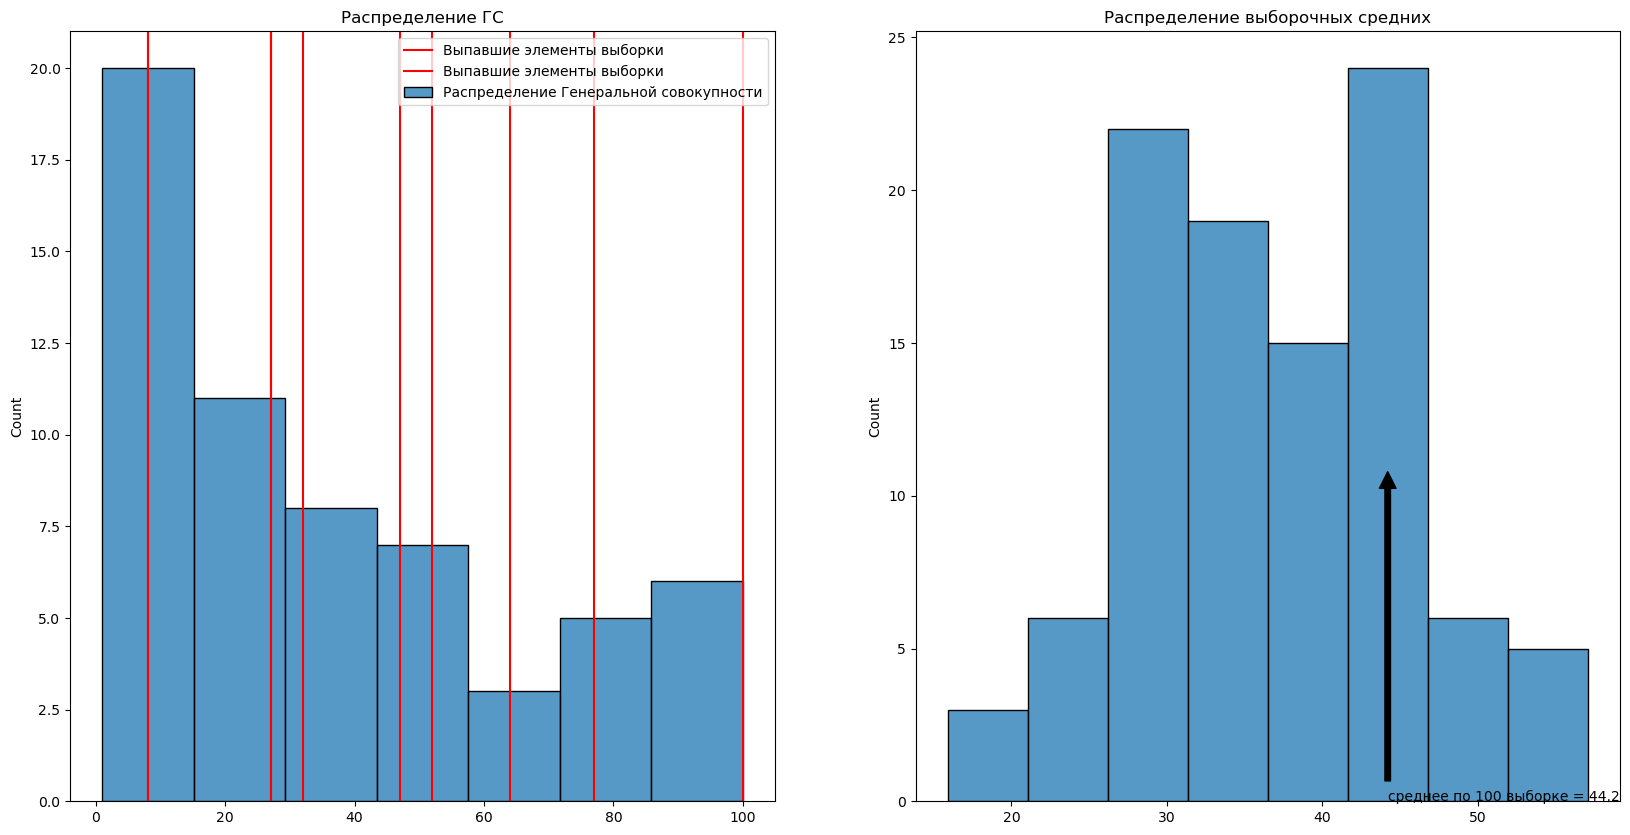

In [72]:
N = 100
M = 10

means = central_limit_theorem_animation(population, N, M)

* Ниже запущен статистический тест [Шапиро-Уилка](https://ru.wikipedia.org/wiki/%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B8_%D0%BD%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D1%81%D1%82%D0%B8). Подробнее о работе статистических тестов мы будем говорить в следующие дни. А сейчас достаточно того, что если __pvalue__ > 0.05 - распределение считается нормальным!

In [79]:
st.shapiro(means)

ShapiroResult(statistic=0.9879122376441956, pvalue=0.5017593502998352)

* __Получилось, что центральная предельная теорема работает и для произвольного распределения, которые достаточно часто возникют на практике__